<a href="https://colab.research.google.com/github/MinhDucBee1209/Bai-Tap-AI/blob/main/Adaptive_Food_Suggestion_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a5163a6568521b4969c69e4bb43a02248baf8ef1b8bf00d798c910476d65b9e2
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


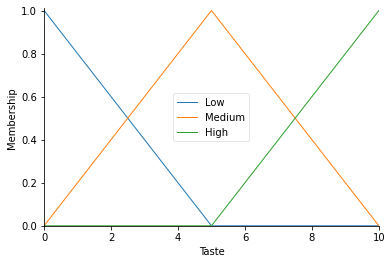

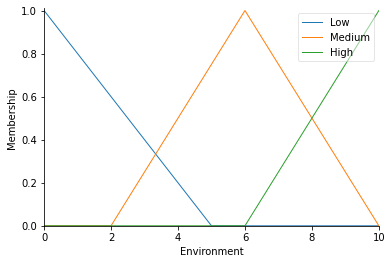

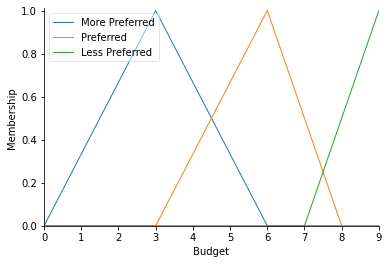

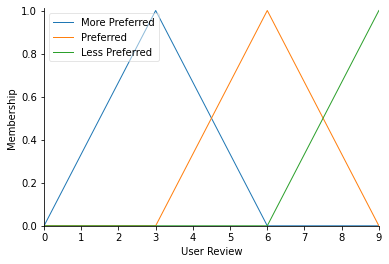

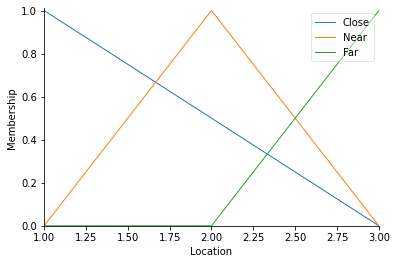

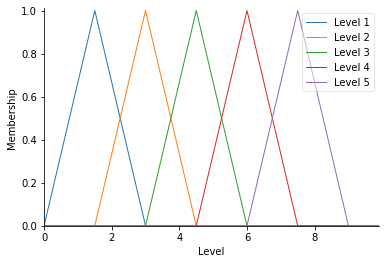

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctal

taste =ctal.Antecedent(np.arange(0,11,1),'Taste')
environment=ctal.Antecedent(np.arange(0,11,1),'Environment')   
budget=ctal.Antecedent(np.arange(0,10,1),'Budget')
userReview=ctal.Antecedent(np.arange(0,10,1),'User Review')
location=ctal.Antecedent(np.arange(1,4,1),'Location')

level=ctal.Consequent(np.arange(0,10,0.1),'Level') 

taste['Low']=fuzz.trimf(taste.universe,[0,0,5])
taste['Medium']=fuzz.trimf(taste.universe,[0,5,10])
taste['High']=fuzz.trimf(taste.universe,[5,10,10])

environment['Low']=fuzz.trimf(environment.universe,[0,0,5])
environment['Medium']=fuzz.trimf(environment.universe,[2,6,10])
environment['High']=fuzz.trimf(environment.universe,[6,10,10])

budget['More Preferred']=fuzz.trimf(budget.universe,[0,3,6])
budget['Preferred']=fuzz.trimf(budget.universe,[3,6,8])
budget['Less Preferred']=fuzz.trimf(budget.universe,[7,9,9])

userReview['More Preferred']=fuzz.trimf(userReview.universe,[0,3,6])
userReview['Preferred']=fuzz.trimf(userReview.universe,[3,6,9])
userReview['Less Preferred']=fuzz.trimf(userReview.universe,[6,9,9])

location['Close']=fuzz.trimf(location.universe,[1,1,3])
location['Near']=fuzz.trimf(location.universe,[1,2,3])
location['Far']=fuzz.trimf(location.universe,[2,3,3])

level['Level 1']=fuzz.trimf(level.universe,[0,1.5,3])
level['Level 2']=fuzz.trimf(level.universe,[1.5,3,4.5])
level['Level 3']=fuzz.trimf(level.universe,[3,4.5,6])
level['Level 4']=fuzz.trimf(level.universe,[4.5,6,7.5])
level['Level 5']=fuzz.trimf(level.universe,[6,7.5,9])

taste.view()
environment.view()
budget.view()
userReview.view()
location.view()
level.view()

4.178571428571428


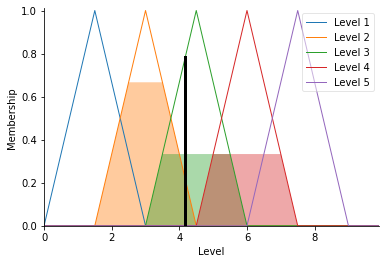

In [3]:
#Tao rule

rule_1=ctal.Rule(taste['Medium'] & environment['Low'] & budget ['Less Preferred'] & location ['Far'] & userReview['Less Preferred'],level['Level 1'])
rule_2=ctal.Rule(taste['Low'] & environment['Medium'] & budget ['Less Preferred'] & location ['Far'] & userReview['Less Preferred'],level['Level 1'])
rule_3=ctal.Rule(taste['Low'] & environment['Low'] & budget ['Preferred'] & location ['Far'] & userReview['Less Preferred'],level['Level 1'])
rule_4=ctal.Rule(taste['Low'] & environment['Low'] & budget ['Less Preferred'] & location ['Near'] & userReview['Less Preferred'],level['Level 1'])
rule_5=ctal.Rule(taste['Low'] & environment['Low'] & budget ['Less Preferred'] & location ['Far'] & userReview['Preferred'],level['Level 1'])

rule_6=ctal.Rule(taste['Medium'] & environment ['Medium'] & budget ['Preferred'] & userReview['Preferred'] & location ['Near'] , level['Level 3'])
rule_7=ctal.Rule(taste['Medium'] & environment['High'] & budget ['More Preferred'] & location ['Close'] & userReview['More Preferred'],level['Level 5'])
rule_8=ctal.Rule(taste['High'] & environment['Medium'] & budget ['More Preferred'] & location ['Close'] & userReview['More Preferred'],level['Level 5'])
rule_9=ctal.Rule(taste['High'] & environment['High'] & budget ['Preferred'] & location ['Close'] & userReview['More Preferred'],level['Level 5'])
rule_10=ctal.Rule(taste['High'] & environment['High'] & budget ['More Preferred'] & location ['Near'] & userReview['More Preferred'],level['Level 5'])

rule_11=ctal.Rule(taste['High'] & environment['High'] & budget ['More Preferred'] & location ['Close'] & userReview['Preferred'],level['Level 5'])
rule_12=ctal.Rule(taste['Low'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_13=ctal.Rule(taste['Medium'] & environment['Low'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_14=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Less Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_15=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Far'] & userReview['Preferred'],level['Level 2'])

rule_16=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['Less Preferred'],level['Level 2'])
rule_17=ctal.Rule(taste['High'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_18=ctal.Rule(taste['Medium'] & environment['High'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_19=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['More Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_20=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Close'] & userReview['Preferred'],level['Level 4'])

rule_21=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['More Preferred'],level['Level 4'])
rule_22=ctal.Rule(taste['Low'] & environment['Low'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_23=ctal.Rule(taste['Medium'] & environment['Low'] & budget ['Less Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_24=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Less Preferred'] & location ['Far'] & userReview['Preferred'],level['Level 2'])
rule_25=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Far'] & userReview['Less Preferred'],level['Level 2'])

rule_26=ctal.Rule(taste['Low'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['Less Preferred'],level['Level 2'])
rule_27=ctal.Rule(taste['High'] & environment['High'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_28=ctal.Rule(taste['Medium'] & environment['High'] & budget ['More Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_29=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['More Preferred'] & location ['Close'] & userReview['Preferred'],level['Level 4'])
rule_30=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Close'] & userReview['More Preferred'],level['Level 4'])

rule_31=ctal.Rule(taste['High'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['More Preferred'],level['Level 4'])
rule_32=ctal.Rule(taste['High'] & environment ['Low'] & budget ['Preferred'] & userReview['Preferred'] & location ['Near'] , level['Level 3'])
rule_33=ctal.Rule(taste['Medium'] & environment ['High'] & budget ['Less Preferred'] & userReview['Preferred'] & location ['Near'] , level['Level 3'])
rule_34=ctal.Rule(taste['Medium'] & environment ['Medium'] & budget ['More Preferred'] & userReview['Less Preferred'] & location ['Near'] , level['Level 3'])
rule_35=ctal.Rule(taste['Medium'] & environment ['Medium'] & budget ['Preferred'] & userReview['More Preferred'] & location ['Far'] , level['Level 3'])

rule_36=ctal.Rule(taste['Low'] & environment ['Medium'] & budget ['Preferred'] & userReview['Preferred'] & location ['Close'] , level['Level 3'])


leveling_ctal=ctal.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,
                                  rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,
                                  rule_21,rule_22,rule_23,rule_24,rule_25,rule_26,rule_27,rule_28,rule_29,rule_30,
                                  rule_31,rule_32,rule_33,rule_34,rule_35,rule_36])
#View and Computing data
leveling=ctal.ControlSystemSimulation(leveling_ctal)
leveling.input['Taste']= 5
leveling.input['Environment']=7
leveling.input['Budget']=5             
leveling.input['User Review']=8
leveling.input['Location']= 2
leveling.compute()
print(leveling.output['Level'])
level.view(leveling)